# Dyna Maze

Consider the simple maze shown inset in Figure 8.2.

In [1]:
from IPython.display import Image

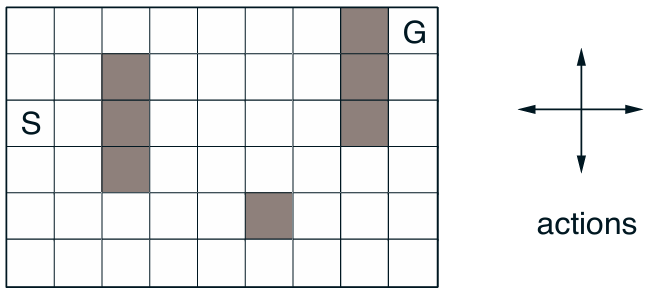

In [2]:
Image(filename="../book_images/Figure_8_2_inset.PNG")

 - In each of the 47 states there are 4 actions: $up, down, right, left,$ which take the agent deterministically to the corresponding neighboring states, except when movement is blocked by an obstacle or the edge of the maze, in which case the agent remains where it is.
- Reward is 0 on all transitions, except those into the goal state, on which it is +1.
- After reaching the goal state $(G)$, the agent returns to the start state $(S)$ to begin a new episode.
- This is a discounted, episodic task with $\gamma=0.95$.

The main part of Figure 8.2 shows average learning curves from an experiment in which Dyna-Q agents were applied to the maze task.
- The initial action values were 0, the step-size parameter was $\alpha=0.1$, and the exploration parameter was $\varepsilon=0.1$.
- When selecting greedily among actions, ties were broken randomly.

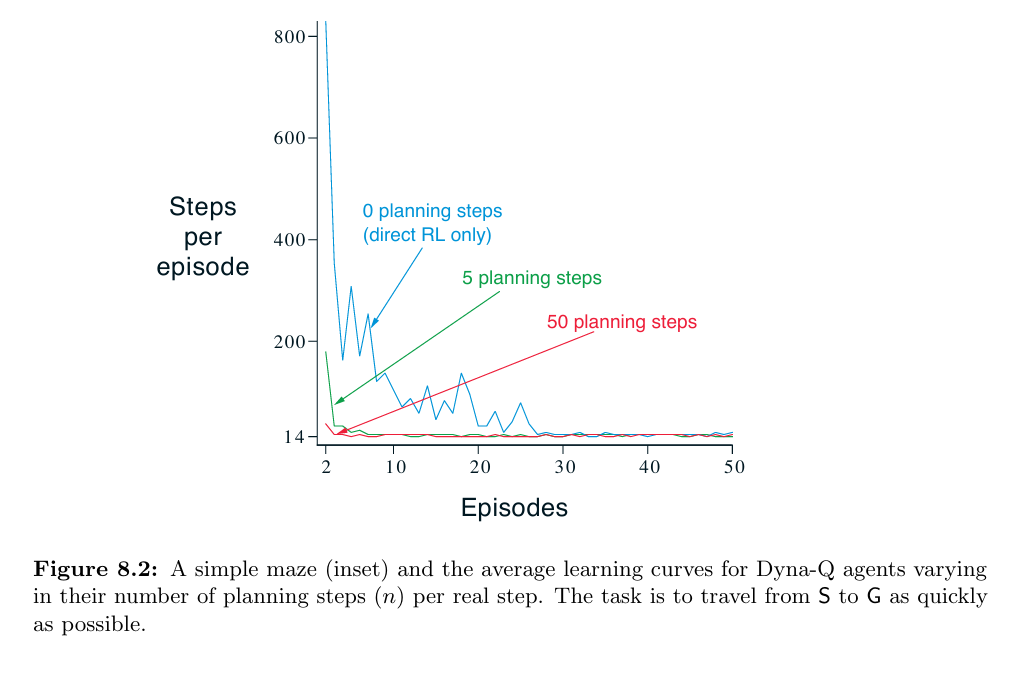

In [3]:
Image(filename="../book_images/Figure_8_2_graph.PNG")

- The agents varied in the number of planning steps, $n$, they performed per real step.
- For each $n$, the curves show the number of steps taken by the agent to reach the goal in each episode, averaged over 30 repetitions of the experiment.
- In each repetition, the initial seed for the random number generator was held constant across algorithms.
  - Because of this, the 1st episode was exactly the same (about 1700 steps) for all values of $n$, and its data are not shown in the figure.
  - After the 1st episode, performance improved for all values of $n$,but much more rapidly for larger values.
- Recall that the $n=0$ agent is a non planning agent, using only direct RL (one-step tabular Q-learning).
  - This was by far the slowest agent on this problem, despite the fact that the parameter values ($\alpha$ and $\varepsilon$) were optimized for it.
  - The non planning agent took about 25 episodes to reach ($\varepsilon$-)optimal performance, whereas the $n=5$ agent took about 5 episodes, and the $n=50$ agent took only 3 episodes.


Figure 8.3 shows why the planning agents found the solution so much faster than the non planning agent.
- Shown are the policies found by the $n=0$ and $n=50$ agents halfway through the 2nd episode.

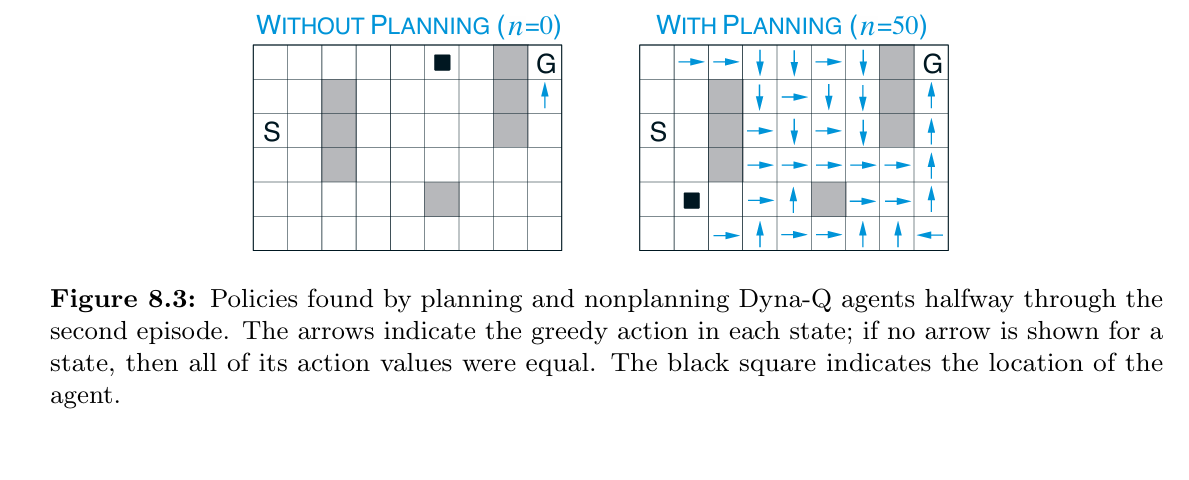

In [4]:
Image(filename="../book_images/Figure_8_3.PNG")

- Without planning $(n=0)$, each episode adds only 1 additional step to the policy, and so only 1 step (the last) has been learned so far.
- With planning, again only 1 step is learned during the 1st episode, but here during the 2nd episode an extensive policy has been developed that by the end of the episode will reach almost back to the start state.
  - This policy is built by the planning process while the agent is still wandering near the start state.
  - By the end of the 3rd episode a complete optimal policy will have been found and perfect performance attained.

In [5]:
import numpy as np
from tqdm import tqdm
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [6]:
from src.maze import Maze
from src.dyna import DynaParams
from src.models import TrivialModel
from src.functions import dyna_q

In [7]:
# Set up an instance for DynaMaze
dyna_maze = Maze()

# Set up an instance for DynaParams
dyna_params = DynaParams()

In [8]:
# Number of runs
runs = 10

# Number of episodes
episodes = 50

In [9]:
# Create a list for planning steps
planning_steps = [0, 5, 50]

# Create an array for steps filled with 0s
steps = np.zeros((len(planning_steps), episodes))

In [10]:
# For every run
for _ in tqdm(range(runs)):
    # for every planning step
    for i, planning_step in enumerate(planning_steps):
        # set the planning steps of Dyna algorithm
        dyna_params.planning_steps = planning_step
        
        # initialize action-value estimates with 0s
        action_value_estimates = np.zeros(dyna_maze.action_value_estimates_size)

        # generate an instance of Dyna-Q model
        model = TrivialModel()
        
        # for every episode
        for episode in range(episodes):
            # print('run:', run, 'planning step:', planning_step, 'episode:', episode)
            
            # get the steps according to Dyna-Q algorithm
            steps[i, episode] += dyna_q(action_value_estimates, model, dyna_maze, dyna_params)

# Average the steps over runs
steps /= runs

100%|██████████| 10/10 [00:36<00:00,  3.69s/it]


In [11]:
# Plotting
for i in range(len(planning_steps)):
    plt.plot(steps[i, :], label=f"{planning_steps[i]} planning steps")

plt.xlabel("Episodes")
plt.ylabel("Steps per episode")
plt.legend()

plt.savefig("../generated_images/figure_8_2.png")
plt.close()